## Assignment 4

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
from matplotlib import pyplot as plt

from IPython.display import clear_output

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In class on Wednesday, March 26 we trained two neural networks models for classifying fashion MNIST.
We'll call them **Model A** and **Model B**.

In [0]:
# Model A
modelA = Sequential([Input((28, 28)),
                    Flatten(),
                    Dense(256, activation="relu"),
                    Dropout(0.2),
                    Dense(128, activation="relu"),
                    Dense(64, activation="relu"),
                    Dropout(0.2),
                    Dense(10, activation="softmax")], name="Model_A")
modelA.summary()
modelA.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Model: "Model_A"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_40 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                650 

In [0]:
# Model B
modelB = Sequential(name="Model_B")
modelB.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1))) # zero-padding
modelB.add(MaxPooling2D(2))
modelB.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
modelB.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
modelB.add(MaxPooling2D(2))
modelB.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
modelB.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
modelB.add(MaxPooling2D(2))
modelB.add(Flatten())
modelB.add(Dense(128, activation="relu"))
modelB.add(Dropout(0.5))
modelB.add(Dense(64, activation="relu"))
modelB.add(Dropout(0.5))
modelB.add(Dense(10, activation="softmax"))
modelB.summary()
modelB.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Model: "Model_B"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 256)         5900

### 1.

**Train** each model for 20 epochs, just like we did in class and then **save** the models. (See [the docs](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) or page 314 of G&eacute;ron.)

#### Fashion mnist data

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_tr, y_tr), (X_te, y_te) = fashion_mnist.load_data ()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
CLASSES = "T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot".split(",");

In [8]:
#   Normalise X_tr and X_te, and one-hot encode y_tr and y_te
X_tr = (X_tr/255.).astype(np.float32)
Y_tr = np.zeros((60000, 10)).astype(np.float32)
Y_tr[np.arange(60000), y_tr] = 1
print (X_tr.shape, Y_tr.shape)

X_te = (X_te/255.).astype(np.float32)
Y_te = np.zeros((10000, 10)).astype(np.float32)
Y_te[np.arange(10000), y_te] = 1
print (X_te.shape, Y_te.shape)

(60000, 28, 28) (60000, 10)
(10000, 28, 28) (10000, 10)


#### Model A

In [0]:
modelA.fit (X_tr, Y_tr, epochs = 20, batch_size = 32, validation_data = (X_te, Y_te))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8708 - accuracy: 0.6967 - val_loss: 0.5567 - val_accuracy: 0.8031
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5574 - accuracy: 0.8075 - val_loss: 0.4787 - val_accuracy: 0.8300
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4890 - accuracy: 0.8303 - val_loss: 0.4471 - val_accuracy: 0.8410
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4506 - accuracy: 0.8425 - val_loss: 0.4222 - val_accuracy: 0.8486
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4261 - accuracy: 0.8502 - val_loss: 0.4092 - val_accuracy: 0.8500
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4049 - accuracy: 0.8583 - val_loss: 0.4138 - val_accuracy: 0.8479
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3916 - accuracy: 0.8616 - val_loss: 0.3912 - val_accuracy:

In [0]:
#   Saving model to folder in my GDrive
modelA.save ('/content/drive/My Drive/Data Science/DS607/modelA.h5')

#   I saved my trained models, modelA and modelB, to Google Drive because it became inconvinient to constantly lose the models when colab would be disconnected
#   and erase the files.

#### Model B

In [0]:
#   ModelB requires the data to have three dimensions, so an extra dimension is added to X_tr and X_te.
XB_tr = np.expand_dims (X_tr, axis=3)
XB_te = np.expand_dims (X_te, axis=3)
print (XB_tr.shape, XB_te.shape, Y_tr.shape, Y_te.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [0]:
modelB.fit (XB_tr, Y_tr, epochs = 20, batch_size = 32, validation_data = (XB_te, Y_te))

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.3835 - accuracy: 0.4848 - val_loss: 0.7470 - val_accuracy: 0.7293
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8057 - accuracy: 0.7071 - val_loss: 0.6044 - val_accuracy: 0.7747
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6587 - accuracy: 0.7631 - val_loss: 0.5251 - val_accuracy: 0.8126
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5821 - accuracy: 0.7922 - val_loss: 0.4770 - val_accuracy: 0.8330
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5375 - accuracy: 0.8121 - val_loss: 0.4340 - val_accuracy: 0.8417
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4973 - accuracy: 0.8252 - val_loss: 0.4103 - val_accuracy: 0.8497
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4720 - accuracy: 0.8357 - val_loss: 0.3954 - val_ac

In [0]:
#   Saving model to folder in my GDrive
modelB.save ('/content/drive/My Drive/Data Science/DS607/modelB.h5')

### 2.

Do this exercise using **either Model A or Model B**.

Construct the confusion matrix $C$ of the test set, i.e., the $10\times 10$ matrix whose $(i,j)$-entry is the number of images of class $i$ mistakenly classified as class $j$.
Produce a nice visualization of the confusion matrix in the spirit of [this example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) from the scikit-learn docs.

The **symmetric confusion score** for an unordered pair $\{i,j\}$ of indices is the sum $C_{ij} + C_{ji}$. It's the number of times images of classes $i$ and $j$ were mistaken for one another. Which pairs of features have the three highest symmetrized confusion scores?

#### Confusion matrix

In [9]:
#   Model A is used for question 2.

y_pred = np.argmax (modelA.predict (X_te), axis = 1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
#   Confusion matrix

C = tf.math.confusion_matrix (labels = y_te, predictions = y_pred).numpy ()
C_norm = np.around (C.astype ('float') / C.sum (axis = 1)[:, np.newaxis], decimals = 2)   #   normalised confusion matrix

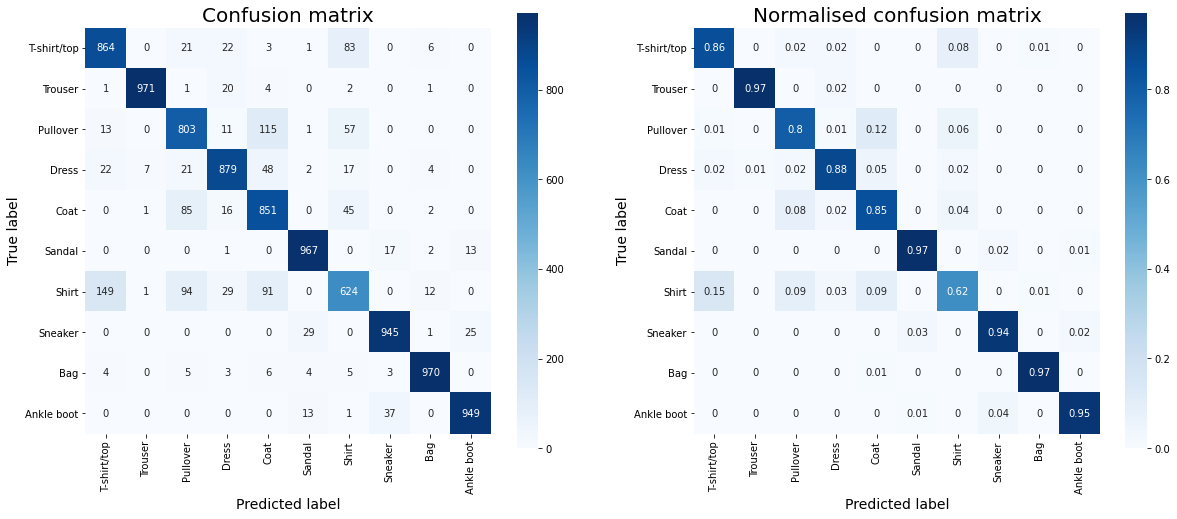

In [20]:
C_df = pd.DataFrame (C, index = CLASSES, columns = CLASSES)
C_norm_df = pd.DataFrame (C_norm, index = CLASSES, columns = CLASSES)

fig, axes = plt.subplots (1, 2, figsize = (20, 8))
p1 = sn.heatmap (C_df, annot = True, fmt = 'd', cmap = plt.cm.Blues, ax = axes[0], square = True)
p1.set_xlabel ('Predicted label', fontdict = {'fontsize': 14})
p1.set_ylabel ('True label', fontdict = {'fontsize': 14})
p1.set_title ('Confusion matrix', fontdict = {'fontsize': 20})
p2 = sn.heatmap (C_norm_df, annot = True, cmap = plt.cm.Blues, ax = axes[1], square = True)
p2.set_xlabel ('Predicted label', fontdict = {'fontsize': 14})
p2.set_ylabel ('True label', fontdict = {'fontsize': 14})
p2.set_title ('Normalised confusion matrix', fontdict = {'fontsize': 20})
plt.show ()

#### Symmetrised confusion scores

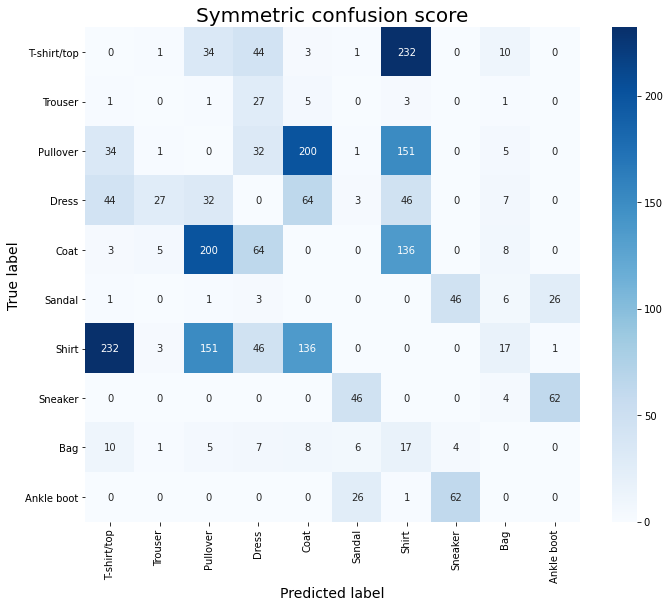

In [18]:
#   Symmetrised confusion scores

CC = C - np.diag (np.diagonal (C))   #   removing the values of the diagonal

CCC = CC + CC.T   #   calculating the symmetrised confusion scores (C_ij + C_ji) by adding the confusion matrix to the transposed confusion matrix

CCC_df = pd.DataFrame (CCC, index = CLASSES, columns = CLASSES)

figure = plt.figure (figsize = (10, 8))
sn.heatmap (CCC_df, annot = True, fmt = 'd', cmap = plt.cm.Blues, square = True)
plt.tight_layout()
plt.title ('Symmetric confusion score', fontdict = {'fontsize': 20})
plt.ylabel ('True label', fontdict = {'fontsize': 14})
plt.xlabel ('Predicted label', fontdict = {'fontsize': 14})
plt.show ()

Shirt and T-shirt/top (232), Coat and Pullover (200), Shirt and Pullover (151) were most often mistaken for each other.

### 3.

Do this exercise using **either Model A or Model B**.

For each ordered pair of indices $(i,j)$, find the image of class $i$ mistakenly classified as class $j$ with the lowest/highest
- categorical crossentropy loss is the lowest/highest. Loss functions are located in the `tensorflow.keras.losses` module.

- predicted probability of belonging to class $j$. These predicted probabilities are the output of `model.predict`.

Plot these extremal predictions in grids; four grids in total corresponding to the four possible choices of lowest/highest and loss/probability. Assuming you're using `matplotlib`, I suggest either [`subplots`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html) or [`ImageGrid`](https://matplotlib.org/3.1.1/api/_as_gen/mpl_toolkits.axes_grid1.axes_grid.ImageGrid.html#mpl_toolkits.axes_grid1.axes_grid.ImageGrid).

#### Categorical crossentropy loss

In [0]:
#   ModelA is used for question 3
y_pred_m = modelA.predict (X_te)
y_predict = np.argmax (y_pred_m, axis = 1)

Y_predict = tf.one_hot (y_predict, depth = 10).numpy ()

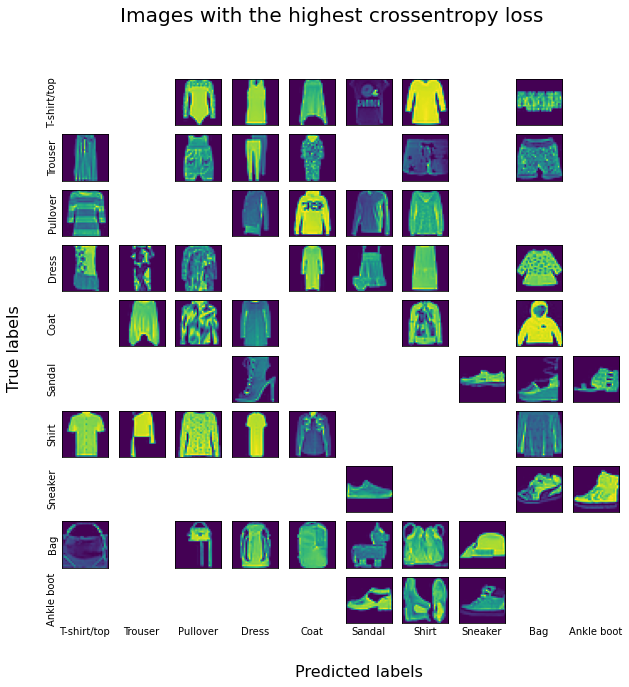

In [27]:
#   Highest categorical crossentropy loss

fig, axes = plt.subplots (10, 10, figsize = (10, 10))

for true in range (10):
    for pred in range (10):
        if true != pred:
            try:
                I = (y_te == true) * (y_predict == pred)

                losses = keras.losses.categorical_crossentropy (Y_te[I, :], Y_predict[I, :]).numpy ()

                axes[true][pred].imshow (X_te[I, :][np.argmax (losses), :])
                axes[9][pred].set_xlabel (f'{CLASSES[pred]}')
                axes[true][0].set_ylabel (f'{CLASSES[true]}')
                axes[true][pred].tick_params(
                    axis = 'both',
                    which ='both',
                    bottom = False,
                    top = False,
                    left = False,
                    right = False,
                    labelbottom = False,
                    labelleft = False
                    )


            except:
            #   The exception accounts for the pairs of indices where there were not any classification mistakes.
                axes[9][pred].set_xlabel (f'{CLASSES[pred]}')
                axes[true][pred].tick_params(
                    axis = 'both',
                    which ='both',
                    bottom = False,
                    top = False,
                    left = False,
                    right = False,
                    labelbottom = False,
                    labelleft = False
                    )
                axes[true][pred].set_frame_on (False)
                
                pass
        else:
            axes[true][pred].tick_params(
                    axis = 'both',
                    which ='both',
                    bottom = False,
                    top = False,
                    left = False,
                    right = False,
                    labelbottom = False,
                    labelleft = False
                    )
            axes[true][pred].set_frame_on (False)
            continue
    
fig.suptitle ('Images with the highest crossentropy loss', fontsize = 20)
fig.text (0.45, 0.05, 'Predicted labels', size = 16)
fig.text (0.05, 0.45, 'True labels', rotation = 'vertical', size = 16)

plt.show ()

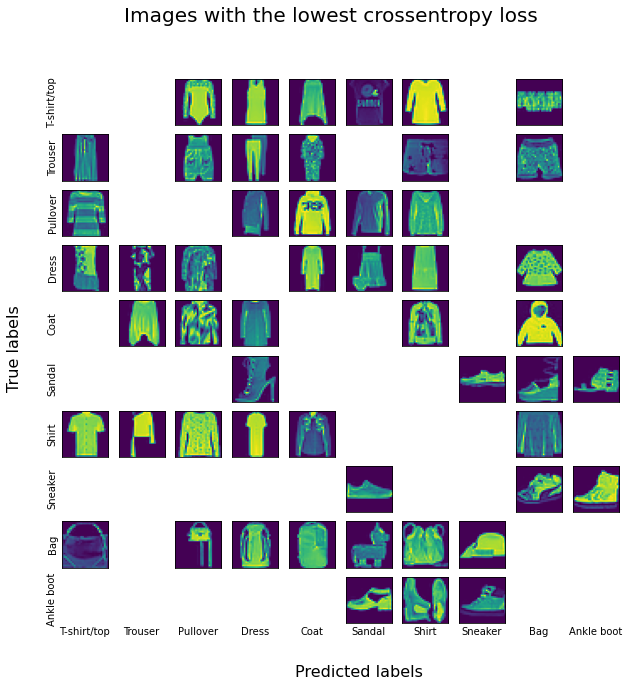

In [28]:
#   Lowest categorical crossentropy loss

fig, axes = plt.subplots (10, 10, figsize = (10, 10))

for true in range (10):
    for pred in range (10):
        if true != pred:
            try:
                I = (y_te == true) * (y_predict == pred)

                losses = keras.losses.categorical_crossentropy (Y_te[I, :], Y_predict[I, :]).numpy ()

                axes[true][pred].imshow (X_te[I, :][np.argmin (losses), :])
                axes[9][pred].set_xlabel (f'{CLASSES[pred]}')
                axes[true][0].set_ylabel (f'{CLASSES[true]}')
                axes[true][pred].tick_params(
                    axis = 'both',
                    which ='both',
                    bottom = False,
                    top = False,
                    left = False,
                    right = False,
                    labelbottom = False,
                    labelleft = False
                    )

            except:
                axes[9][pred].set_xlabel (f'{CLASSES[pred]}')
                axes[true][pred].tick_params(
                    axis = 'both',
                    which ='both',
                    bottom = False,
                    top = False,
                    left = False,
                    right = False,
                    labelbottom = False,
                    labelleft = False
                    )
                axes[true][pred].set_frame_on (False)
                
                pass
        else:
            axes[true][pred].tick_params(
                    axis = 'both',
                    which ='both',
                    bottom = False,
                    top = False,
                    left = False,
                    right = False,
                    labelbottom = False,
                    labelleft = False
                    )
            axes[true][pred].set_frame_on (False)
            continue

fig.suptitle ('Images with the lowest crossentropy loss', fontsize = 20)
fig.text (0.45, 0.05, 'Predicted labels', size = 16)
fig.text (0.05, 0.45, 'True labels', rotation = 'vertical', size = 16)

plt.show ()

#### Prediction probability

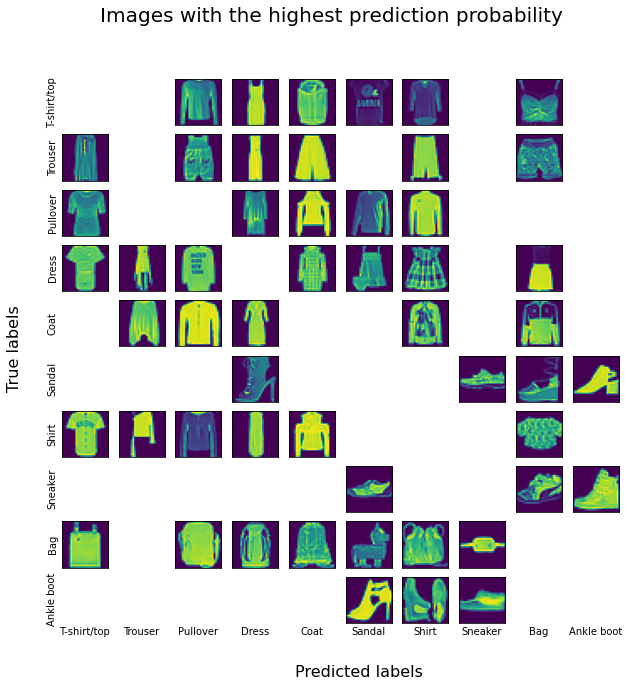

In [29]:
#   Highest prediction probability

fig, axes = plt.subplots (10, 10, figsize = (10, 10))

for true in range (10):
    for pred in range (10):
        if true != pred:
            try:
                I = (y_te == true) * (y_predict == pred)

                pred_prob = modelA.predict (X_te[I, :])

                axes[true][pred].imshow (X_te[I, :][np.argmax (np.max (pred_prob, axis = 1)), :])
                axes[9][pred].set_xlabel (f'{CLASSES[pred]}')
                axes[true][0].set_ylabel (f'{CLASSES[true]}')
                axes[true][pred].tick_params(
                    axis = 'both',
                    which ='both',
                    bottom = False,
                    top = False,
                    left = False,
                    right = False,
                    labelbottom = False,
                    labelleft = False
                    )

            except:
                axes[9][pred].set_xlabel (f'{CLASSES[pred]}')
                axes[true][pred].tick_params(
                    axis = 'both',
                    which ='both',
                    bottom = False,
                    top = False,
                    left = False,
                    right = False,
                    labelbottom = False,
                    labelleft = False
                    )
                axes[true][pred].set_frame_on (False)
                
                pass
        else:
            axes[true][pred].tick_params(
                    axis = 'both',
                    which ='both',
                    bottom = False,
                    top = False,
                    left = False,
                    right = False,
                    labelbottom = False,
                    labelleft = False
                    )
            axes[true][pred].set_frame_on (False)
            continue

fig.suptitle ('Images with the highest prediction probability', fontsize = 20)
fig.text (0.45, 0.05, 'Predicted labels', size = 16)
fig.text (0.05, 0.45, 'True labels', rotation = 'vertical', size = 16)

plt.show ()

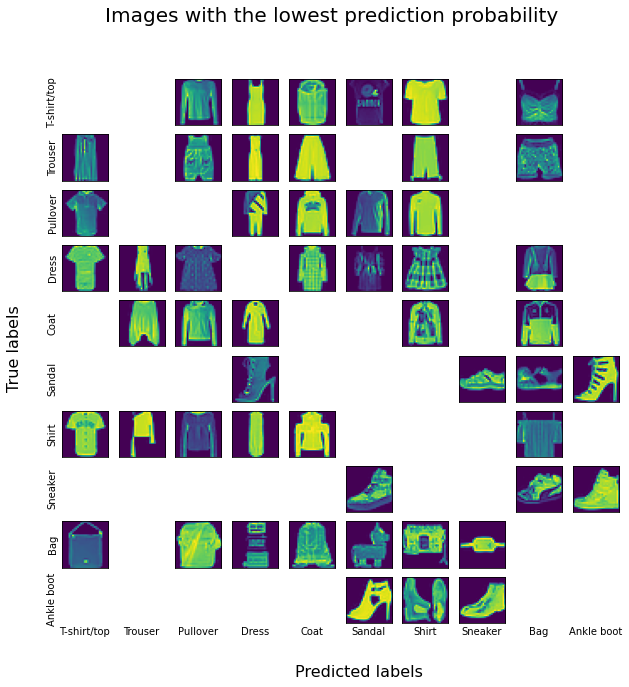

In [30]:
#   Lowest prediction probability

fig, axes = plt.subplots (10, 10, figsize = (10, 10))

for true in range (10):
    for pred in range (10):
        if true != pred:
            try:
                I = (y_te == true) * (y_predict == pred)

                pred_prob = modelA.predict (X_te[I, :])

                axes[true][pred].imshow (X_te[I, :][np.argmin (np.min (pred_prob, axis = 1)), :])
                axes[9][pred].set_xlabel (f'{CLASSES[pred]}')
                axes[true][0].set_ylabel (f'{CLASSES[true]}')
                axes[true][pred].tick_params(
                    axis = 'both',
                    which ='both',
                    bottom = False,
                    top = False,
                    left = False,
                    right = False,
                    labelbottom = False,
                    labelleft = False
                    )

            except:
                axes[9][pred].set_xlabel (f'{CLASSES[pred]}')
                axes[true][pred].tick_params(
                    axis = 'both',
                    which ='both',
                    bottom = False,
                    top = False,
                    left = False,
                    right = False,
                    labelbottom = False,
                    labelleft = False
                    )
                axes[true][pred].set_frame_on (False)
                
                pass
        else:
            axes[true][pred].tick_params(
                    axis = 'both',
                    which ='both',
                    bottom = False,
                    top = False,
                    left = False,
                    right = False,
                    labelbottom = False,
                    labelleft = False
                    )
            axes[true][pred].set_frame_on (False)
            continue

fig.suptitle ('Images with the lowest prediction probability', fontsize = 20)
fig.text (0.45, 0.05, 'Predicted labels', size = 16)
fig.text (0.05, 0.45, 'True labels', rotation = 'vertical', size = 16)

plt.show ()

### 4.

We use the architecture and weights of a neural network trained on a large data set as initialization values for retraining the same network on a much smaller data set of a similar nature. This approach is known as **transfer learning**.

Load the **MNIST handwritten digit data** (`keras.datasets.mnist.load_data`), both training and testing sets.
For $n=100, 200, ...$, retrain your models A and B on a $n$ randomly selected training images and record the accuracy on the full test set.
How large does $n$ need to be to achieve 95% accuracy on the test set? Make sure you reload your weights between training runs!

For $n=100, 200, ...$, train models A and B from scratch (i.e., with random initializations) on a $n$ randomly selected training images and record the accuracy on the full test set.
How large does $n$ need to be to achieve 95% accuracy on the test set? Make sure you reinitialize your weights between training runs!

Comment on the effectiveness of transfer learning in the context of your computaitons.



#### Models

In [0]:
#   Model A

def modelA () -> Model:
    modelA = Sequential([Input((28, 28)),
                        Flatten(),
                        Dense(256, activation="relu"),
                        Dropout(0.2),
                        Dense(128, activation="relu"),
                        Dense(64, activation="relu"),
                        Dropout(0.2),
                        Dense(10, activation="softmax")], name="Model_A")
    modelA.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

    return modelA

In [0]:
#   Model B

def modelB () -> Model:
    modelB = Sequential(name="Model_B")
    modelB.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
    modelB.add(MaxPooling2D(2))
    modelB.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
    modelB.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
    modelB.add(MaxPooling2D(2))
    modelB.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    modelB.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    modelB.add(MaxPooling2D(2))
    modelB.add(Flatten())
    modelB.add(Dense(128, activation="relu"))
    modelB.add(Dropout(0.5))
    modelB.add(Dense(64, activation="relu"))
    modelB.add(Dropout(0.5))
    modelB.add(Dense(10, activation="softmax"))
    modelB.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

    return modelB

#### Handwritten digit mnist

In [33]:
digit_data = keras.datasets.mnist
(X2_tr, y2_tr), (X2_te, y2_te) = digit_data.load_data ()

print ((X2_tr.shape, y2_tr.shape), (X2_te.shape, y2_te.shape))

11493376/11490434 [==============================] - 0s 0us/step
((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


In [34]:
X2_tr = (X2_tr/255.).astype(np.float32)
Y2_tr = np.zeros((60000, 10)).astype(np.float32)
Y2_tr[np.arange(60000), y2_tr] = 1
print(X2_tr.shape, Y2_tr.shape)

X2_te = (X2_te/255.).astype(np.float32)
Y2_te = np.zeros((10000, 10)).astype(np.float32)
Y2_te[np.arange(10000), y2_te] = 1
print(X2_te.shape, Y2_te.shape)

(60000, 28, 28) (60000, 10)
(10000, 28, 28) (10000, 10)


In [0]:
# Model A

modelA = keras.models.load_model ('/content/drive/My Drive/Data Science/DS607/modelA.h5')
modelA.compile (loss = "categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [0]:
def n_accuracy (n, increm, model_f, pretrained = False):
#   The function will run the process of determining the n number of images needed for the model to achieve an accuracy of 95 %.
#   The purpose of the function is to start training a model using large numbers of images (n), first, and then training the model in increments a order
#   of magnitude smaller than the previous increment. The training set only contains 60000 training images, so, the initial increment should be 10000
#   images. The function will first train the model on n training images increasing in increments of 10000 images. Once the number of x * 10000 images 
#   necessary for an accuracy of 95 % in found, the model is trained on increments of 1000 images and finally on increments of 100 images to find the number 
#   of images needed to achieve an accuracy of 95 % to the hundredth.


#   The four parameters are:
#   n: the initial value of n images to train/retrain the model.
#   increm: the increment n increases for each consecutive training set.
#   model_f: the model being trained. For the function, model_f must be 'modelA' or 'modelB' according to the model functions defined above and
#   the names of the pretrained models.
#   pretrained:
#       if True, the function will retrain the pretrained models, using the previously saved weights.
#       if False, the function will train modelA or modelB from scratch.


    accuracy = 0   #   accuracy is arbitrarily set to zero to start the while loop.

    model = model_f ()

    if model_f == modelA:   
    #   the data will be used as formarted above if modelA is selected.
        X_tr = X2_tr
        X_te = X2_te
        Y_tr = Y2_tr
        Y_te = Y2_te
    
    else:
    #   if modelB is selected, X_tr and X_te will be formatted with an extra dimension to comply with the input of modelB.
        X_tr = np.expand_dims (X2_tr, axis=3)
        X_te = np.expand_dims (X2_te, axis=3)
        Y_tr = Y2_tr
        Y_te = Y2_te

    while accuracy < 0.95:
    #   If the accuracy of the model is less than 0.95, the model will be retrained until an accuracy of 95 % is achieved.

        #   Each time the model is retrained, a larger number of training images will be used to train the model.
        #   The increase in the number of images is dependent on the increment, increm, of increase set in the function parameters.
        n += increm
        print (n)

        if n > 60000:
            print (f'Error: An accuracy of 95 % cannot be achieved by {model_f} with less than the whole training set.')
            break
            #   In the event a subset of training images cannot provide an accuracy of at least 95 %,
            #   the function will be stopped.
        else:
            pass

        #   Each time the model is trained/retrained, n randomly selected training images, and the corresponding labels, will be used.
        ind = np.random.choice (np.arange (len (X2_tr)), n, replace = False)
        Y_tr_n = Y_tr[ind]
        X_tr_n = X_tr[ind]


        if pretrained:
        #   If a pretrained model is being retrained, the weights of the pretrained model will be loaded.
        #   Each run of the loop will reload the pretrained weights of the model.
            model.load_weights (f'/content/drive/My Drive/Data Science/DS607/{model_f.__name__}.h5')
            # print (1)
        else:
        #   If the model is being trained from scratch, the function model_f () will call the model with random initialisation.
        #   Each run of the loop will reinitialise the weights of the model.
            model = model_f ()
            # print (0)

        model.fit (X_tr_n, Y_tr_n, epochs = 20, batch_size = 32, validation_data = (X_te, Y_te))   #   model training

        loss, accuracy = model.evaluate (X_te, Y_te, batch_size = 64)

        clear_output (wait = True)   #   the output of the model training will be erased after each training run.


    #   Because we are looking for the n number of images to the thundredth, once the increment becomes 100, the function can stop and output the results once
    #   an accuracy of at least 95 % is achieved.
    #   An inequality is used in case an initial increment of 10 or an increment that is not a power of 10 is used.
    if increm <= 100:
        print (f'Sample size, n, of {n} (accuracy = {accuracy}) is need for an accuracy of 95 %.')
    
    #   If the increment is not 100, the function is called again with a new increment an order of magnitude lower than the previous increment.
    #   The increment is subtracted from n because if 95 % accuracy is achieved with N images, a value of n less than N needs to be examined if the increment 
    #   is not in hundreds.
    #   For example: using increments of 1000, if n = 4000 trianing images doesn't give an accuray of at least 95 %, but n = 5000 training images does, then n 
    #   in the interval (4000, 5000] must give an accuracy of 95 %. So, 'n - increm' returns n to 4000 and the model will be trained in the interval (4000, 5000] 
    #   using the new increment 'increm / 10 = 100', until the value n to the hundredth is determined.
    else:
        n_accuracy (int (n - increm), int (increm / 10), model_f, pretrained)



#   Because a random subset of the training images is selected for each training run, n = N, the model training does not guaranty the same accuracy
#   for each run on N images. For example: training the model on 10000 images may achieve 95 % accuracy on an increment of 10000. When the increments of 1000
#   are used, a subset of 10000 images may be run again, but this time 95 % accuracy is not achieved, so the final n is larger than 10000, even though the 
#   initial run of 10000 images indicated n should be less than 10000. This does not prevent a result as the last increment tested is 100. So, the model will 
#   still the values of n to the hundred.

In [48]:
#   Retraining modelA with MNIST handwritten digit data.
n_accuracy (0, 10000, modelA, pretrained = True)

Sample size, n, of 7800 (accuracy = 0.9508000016212463) is need for an accuracy of 95 %.


In [49]:
#   Retraining modelB with MNIST handwritten digit data.
n_accuracy (0, 10000, modelB, pretrained = True)

Sample size, n, of 1200 (accuracy = 0.9524000287055969) is need for an accuracy of 95 %.


In [51]:
#   Training modelA with MNIST handwritten digit data from scratch.
n_accuracy (0, 10000, modelA, pretrained = False)

Sample size, n, of 12200 (accuracy = 0.9531000256538391) is need for an accuracy of 95 %.


In [52]:
#   Training modelB with MNIST handwritten digit data from scratch.
n_accuracy (0, 10000, modelB, pretrained = False)

Sample size, n, of 3100 (accuracy = 0.9516000151634216) is need for an accuracy of 95 %.


With transfer learning, modelA and modelB required smaller subsets of training images than training the models from scratch to achieve 95 % accuracy. For modelA, a 50 % larger subset of images was needed to achieve 95 % accuracy. ModelB required a 150 % larger subset of images. 